In [115]:
import numpy as np
import matplotlib.pyplot as plt

# get data
non_seizure = np.genfromtxt("data/TESTNon.txt", delimiter=" ").astype(np.float32)
pre_seizure = np.genfromtxt("data/TESTPre.txt", delimiter=" ").astype(np.float32)
seizure = np.genfromtxt("data/TESTSeiz.txt", delimiter=" ").astype(np.float32)

eeg_data = np.concatenate((non_seizure, pre_seizure, seizure), axis=1)

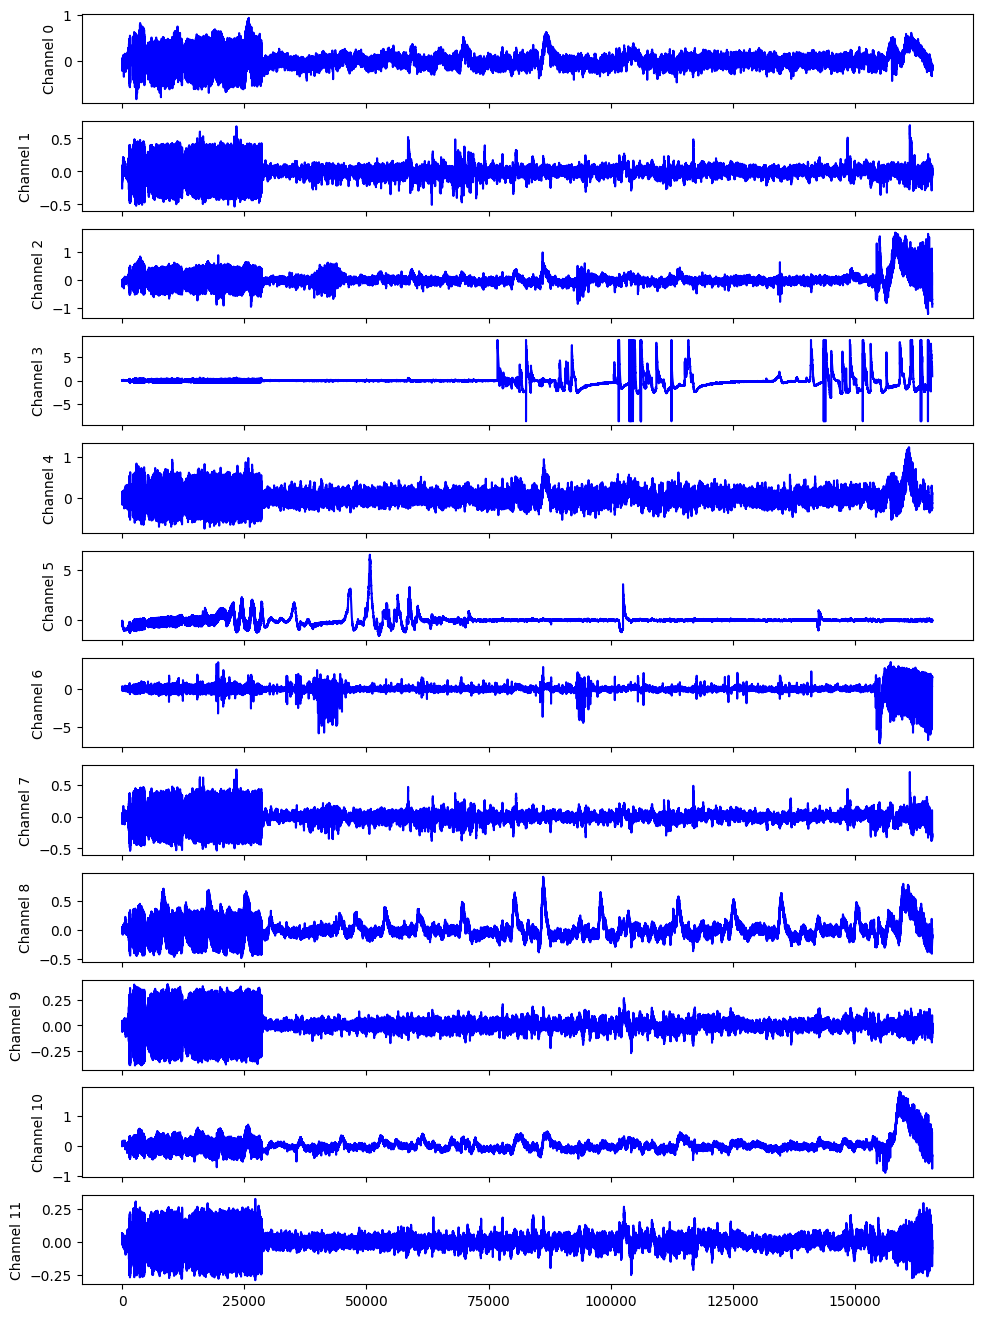

In [116]:
# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(12, 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(12):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

## State 1

Detected at `t=82688`.

In [117]:
from importlib import reload
import CPD.warm

reload(CPD.warm)

<module 'CPD.warm' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\warm.py'>

In [118]:
# put arrays in dictionary for labels
channels = {}
for i in range(12):
    channels[f"channel_{i}"] = eeg_data[i]

In [119]:
# warm up for 100 seconds and determine best lags
fftwarm = CPD.warm.FFTWarm(channels, n0=200, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [120]:
import CPD.CPD
reload(CPD.CPD)

<module 'CPD.CPD' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\CPD.py'>

In [121]:
cpd = CPD.CPD.Online(fftwarm, k=2, prob=0.91)

In [122]:
change_point = cpd.run()

cpt = max(change_point.values())

print(f"change point detected at t={cpt}")

STEP 200
channel_2 detected change point! Halting.
STEP 201
STEP 202
STEP 203
STEP 204
STEP 205
STEP 206
STEP 207
STEP 208
STEP 209
STEP 210
STEP 211
STEP 212
STEP 213
STEP 214
STEP 215
STEP 216
STEP 217
STEP 218
STEP 219
STEP 220
STEP 221
STEP 222
STEP 223
STEP 224
STEP 225
STEP 226
STEP 227
STEP 228
STEP 229
STEP 230
STEP 231
STEP 232
STEP 233
STEP 234
STEP 235
STEP 236
STEP 237
STEP 238
STEP 239
STEP 240
STEP 241
STEP 242
STEP 243
STEP 244
STEP 245
STEP 246
STEP 247
STEP 248
STEP 249
STEP 250
STEP 251
STEP 252
STEP 253
STEP 254
STEP 255
STEP 256
STEP 257
STEP 258
STEP 259
STEP 260
STEP 261
STEP 262
STEP 263
STEP 264
STEP 265
STEP 266
STEP 267
STEP 268
STEP 269
STEP 270
STEP 271
STEP 272
STEP 273
STEP 274
STEP 275
STEP 276
STEP 277
STEP 278
STEP 279
STEP 280
STEP 281
STEP 282
STEP 283
STEP 284
STEP 285
STEP 286
STEP 287
STEP 288
STEP 289
STEP 290
STEP 291
STEP 292
STEP 293
STEP 294
STEP 295
STEP 296
STEP 297
STEP 298
STEP 299
STEP 300
STEP 301
STEP 302
STEP 303
STEP 304
STEP 305
STEP

In [123]:
change_point

{'channel_2': 25600, 'channel_3': 82688}

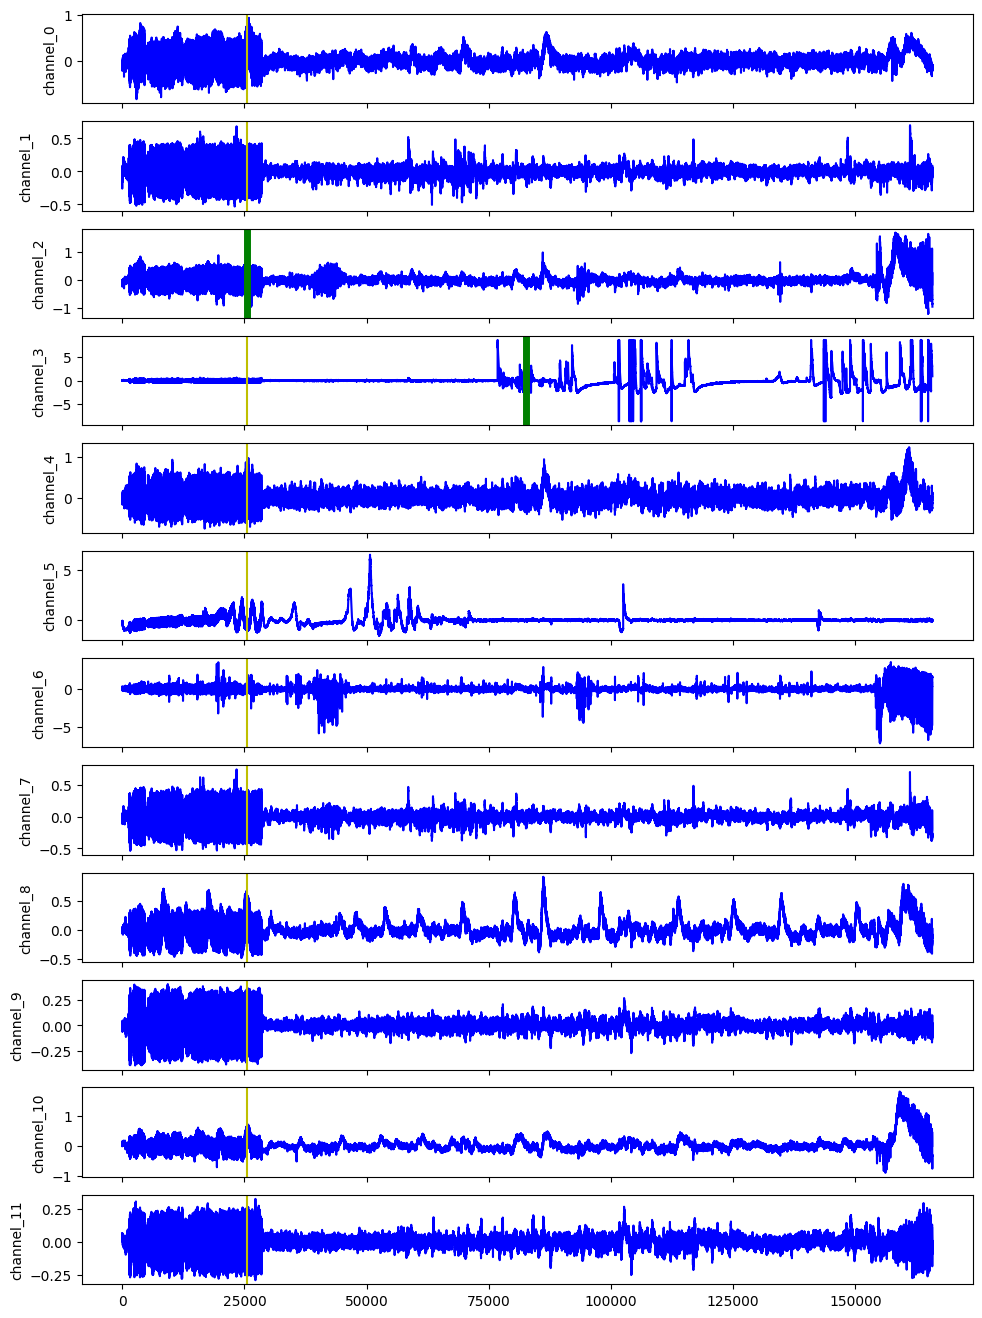

In [124]:
time = [i for i in range(eeg_data.shape[1])]

warmup = 200 * 128

fig, axs = plt.subplots(12, 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(12):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')
    
    axs[c].axvline(x=warmup, c='y')
    if chan in change_point:
        next_cpt = change_point[chan]
        axs[c].axvline(x=next_cpt, c='g', linewidth=5)
    axs[c].set_ylabel(chan)

## State 2

Detected at `t=33024`

In [125]:
# get data past detected change-point `t=28928`

post_channels = {}
for i in range(len(eeg_data)):
    post_channels[f"channel_{i}"] = eeg_data[i][cpt:]

In [126]:
post_channels["channel_0"].shape

(83072,)

In [127]:
# warm up for 100 seconds
fftwarm2 = CPD.warm.FFTWarm(post_channels, n0=200, chunks=4)
fftwarm2.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [128]:
cpd2 = CPD.CPD.Online(fftwarm2, k=2, prob=0.91)

In [129]:
change_points2 = cpd2.run()

cpt2 = max(change_points2.values())

print(f"change point detected at t={cpt2}")

STEP 200
channel_3 detected change point! Halting.
STEP 201
STEP 202
STEP 203
STEP 204
STEP 205
STEP 206
STEP 207
STEP 208
STEP 209
STEP 210
STEP 211
STEP 212
STEP 213
STEP 214
STEP 215
STEP 216
STEP 217
STEP 218
STEP 219
STEP 220
STEP 221
STEP 222
STEP 223
STEP 224
STEP 225
STEP 226
STEP 227
STEP 228
STEP 229
STEP 230
STEP 231
STEP 232
STEP 233
STEP 234
STEP 235
STEP 236
STEP 237
STEP 238
STEP 239
STEP 240
STEP 241
STEP 242
STEP 243
STEP 244
STEP 245
STEP 246
STEP 247
STEP 248
STEP 249
STEP 250
STEP 251
STEP 252
STEP 253
STEP 254
STEP 255
STEP 256
STEP 257
STEP 258
STEP 259
STEP 260
STEP 261
STEP 262
STEP 263
STEP 264
STEP 265
STEP 266
STEP 267
STEP 268
STEP 269
STEP 270
STEP 271
STEP 272
STEP 273
STEP 274
STEP 275
STEP 276
STEP 277
STEP 278
STEP 279
STEP 280
STEP 281
STEP 282
STEP 283
STEP 284
STEP 285
STEP 286
STEP 287
STEP 288
STEP 289
STEP 290
STEP 291
STEP 292
STEP 293
STEP 294
STEP 295
STEP 296
STEP 297
STEP 298
STEP 299
STEP 300
STEP 301
STEP 302
STEP 303
STEP 304
STEP 305
STEP

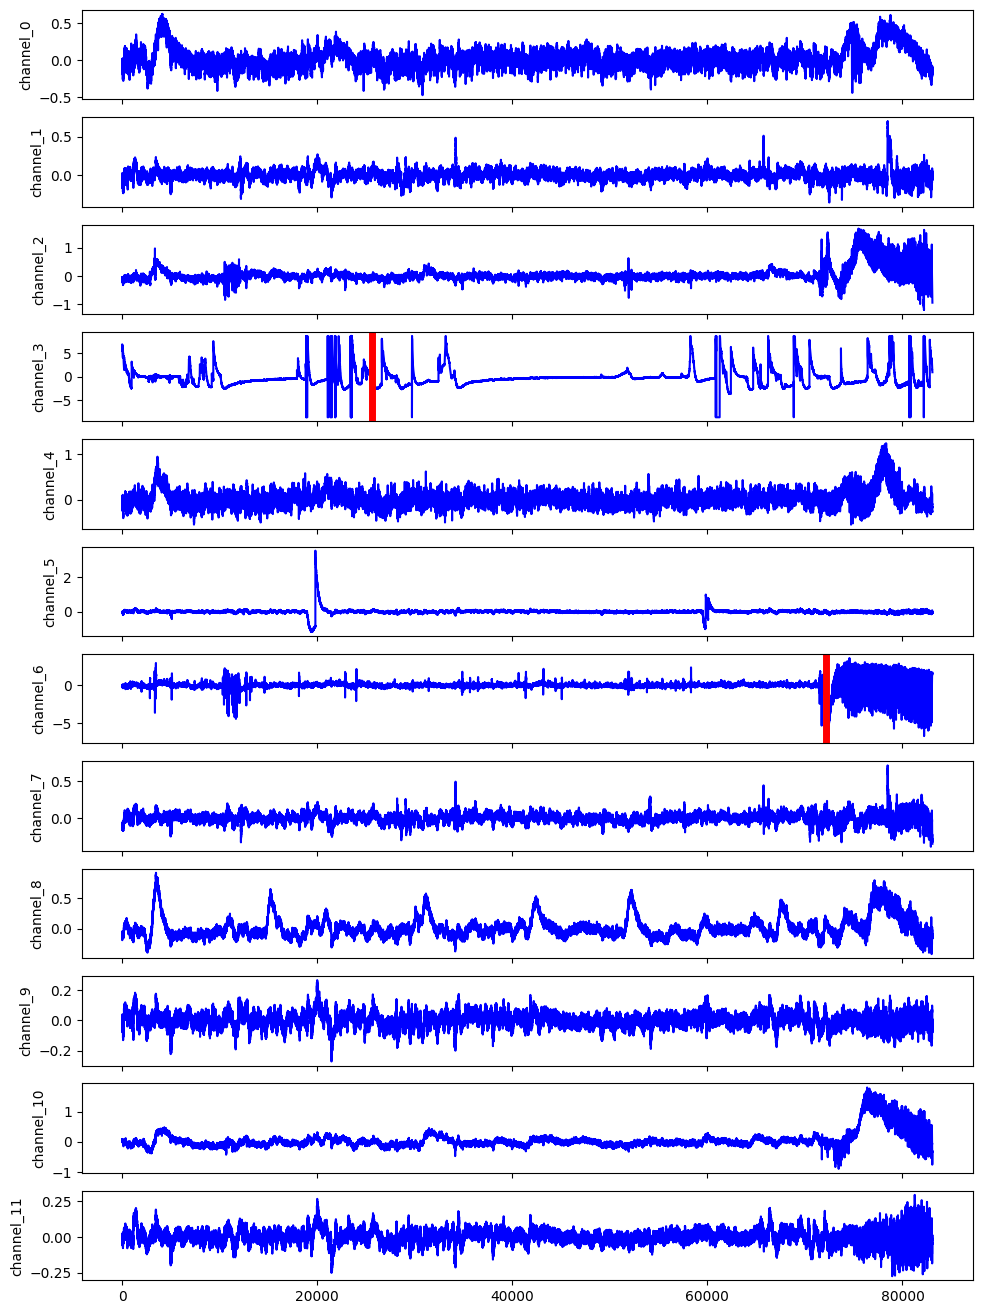

In [130]:
time = [i for i in range(post_channels["channel_0"].shape[0])]

fig, axs = plt.subplots(len(post_channels), 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, post_channels[chan], 'b')

    if chan in change_points2:
        next_cpt = change_points2[chan]
        axs[c].axvline(x=next_cpt, c='r', linewidth=5)

    axs[c].set_ylabel(chan)